# Tutorial 1

## Exercice 1

### a) Chargement des données

In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
datasets = []
for filename in os.listdir("./2nd_test"):
    dataset=pd.read_csv(os.path.join("./2nd_test", filename), sep='\t', names=['Bearing 1','Bearing 2','Bearing 3','Bearing 4'])
    dataset.index = [filename + "." + str(int(488.28*i)).zfill(7) for i in range(20480)]
    dataset.index = pd.to_datetime(dataset.index, format='%Y.%m.%d.%H.%M.%S.%f')
    datasets.append(dataset)

print(datasets[0].head())

                               Bearing 1  Bearing 2  Bearing 3  Bearing 4
2004-02-12 10:32:39.000000000     -0.049     -0.071     -0.132     -0.010
2004-02-12 10:32:39.000048800     -0.042     -0.073     -0.007     -0.105
2004-02-12 10:32:39.000097600      0.015      0.000      0.007      0.000
2004-02-12 10:32:39.000146400     -0.051      0.020     -0.002      0.100
2004-02-12 10:32:39.000195300     -0.107      0.010      0.127      0.054


### b) Affichage des enregistrements 100 et 750

<AxesSubplot: >

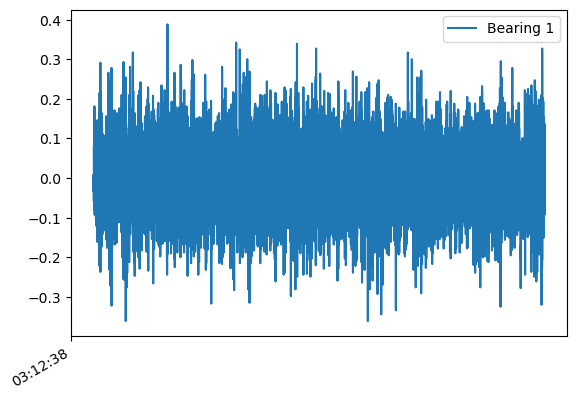

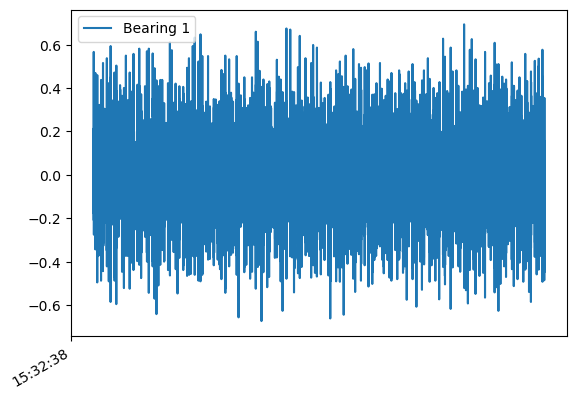

In [3]:
import matplotlib.pyplot as plt

datasets[100].plot(y=["Bearing 1"])
datasets[750].plot(y=["Bearing 1"])

### c) Comparaison visuelle des deux signaux

On remarque très nettement une augmentation de l'amplitude du signal du capteur n°1. On en conclut qu'une nouvelle vibration plus forte a commencé à se faire ressentir dans le premier accéléromètre.

### d) Histogrammes

<AxesSubplot: ylabel='Frequency'>

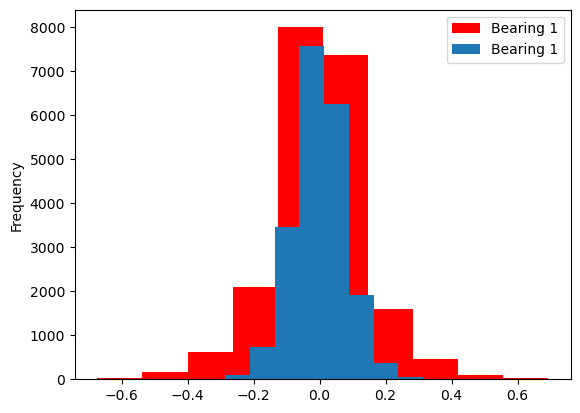

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
datasets[750].plot(y=["Bearing 1"], kind="hist", ax=ax, color='red')
datasets[100].plot(y=["Bearing 1"], kind="hist", ax=ax)

On remarque immédiattement que l'histogramme de l'enregistrement 750 est plus large et d'amplitude plus élevée, confirmant qu'une forte vibration plus ample a commencé à se faire ressentir.

### e)  Cascade des 986 signaux

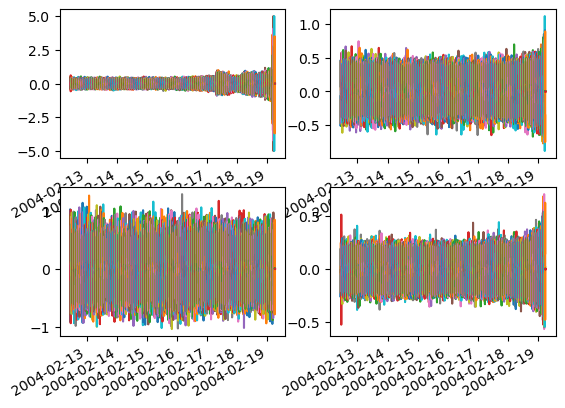

In [5]:
fig = plt.figure()
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)
dx = fig.add_subplot(224)

for dataset in datasets:
    dataset.plot(y=["Bearing 1"], ax=ax, legend=False)
    dataset.plot(y=["Bearing 2"], ax=bx, legend=False)
    dataset.plot(y=["Bearing 3"], ax=cx, legend=False)
    dataset.plot(y=["Bearing 4"], ax=dx, legend=False)
plt.show()

#### a. Évolution de la vibration
La vibration ainsi que son augmentation sont très caractérisées sur le signal du premier capteur. On peut de plus remarquer qu'à un moment comparable, bien qu'ultérieur, les signaux des capteurs 2 et 4 commencent à présenter le même phénomène, bien que moins forte. Le capteur 3 ne semble pas affecté par cette vibration.

#### b. Conclusion
L'anomalie a dû apparaître proche du premier capteur, un peu plus loin du second capteur et à une distance encore plus lointaine du quatrième, qui doivent être à l'opposé ou plus proche que le troisième capteur.

## Exercice 2

### a et b) Implémentation des fonctions

In [6]:
def peak_to_peak(signal):
    return max(signal)-min(signal)

def rms(signal):
    mu = np.mean(signal)
    return np.sqrt(1/len(signal) * sum([(x-mu)**2 for x in signal]))

def kurtosis(signal):
    sigma = np.std(signal)
    mu = np.mean(signal)
    return 1/len(signal) * sum([((x-mu)/sigma)**4 for x in signal])

def crest_factor(signal):
    return max(signal)/rms(signal)

def skewness(signal):
    sigma = np.std(signal)
    mu = np.mean(signal)
    return 1/len(signal) * sum([((x-mu)/sigma)**3 for x in signal])

def statistical_indicators(signal):
    return peak_to_peak(signal), rms(signal), kurtosis(signal), crest_factor(signal), skewness(signal)

In [7]:
# Test

signal = datasets[0]["Bearing 1"]
ptp_c, rms_c, kurtosis_c, cf_c, skewness_c = statistical_indicators(signal)

print("peak to peak calculé : {0}\npeak to peak intégré : {1}\n".format(ptp_c, np.ptp(signal)))
print("rms calculé : {0}\nrms intégré : {1}\n".format(rms_c, np.sqrt(np.mean(signal ** 2))))
print("kurtosis calculé : {0}\nkurtosis intégré : {1}\n".format(kurtosis_c, scipy.stats.kurtosis(signal, fisher=False)))
print("crest_factor calculé : {0}\n".format(cf_c))
print("skewness calculé : {0}\nskewness intégré : {1}\n".format(skewness_c, scipy.stats.skew(signal)))

peak to peak calculé : 0.8400000000000001
peak to peak intégré : 0.8400000000000001

rms calculé : 0.07347493104305139
rms intégré : 0.07417899856512641

kurtosis calculé : 3.6287626426444315
kurtosis intégré : 3.6287626426442556

crest_factor calculé : 6.1789782386319825

skewness calculé : 0.08399343541253336
skewness intégré : 0.08399343541253228



### c) Affichage des indicateurs statistiques

In [8]:
# Géneration des indicateurs statistiques stats

peak_to_peak_stats = [[]]*4
root_mean_square_stats = [[]]*4
kurtosis_stats = [[]]*4
crest_stats = [[]]*4
skewnes_stats = [[]]*4

for dataset in datasets:
    for i in range(4):
        data = dataset[f"Bearing {i+1}"]
        stats = statistical_indicators(data)
        peak_to_peak_stats[i].append(stats[0])
        root_mean_square_stats[i].append(stats[1])
        kurtosis_stats[i].append(stats[2])
        crest_stats[i].append(stats[3])
        skewnes_stats[i].append(stats[4])

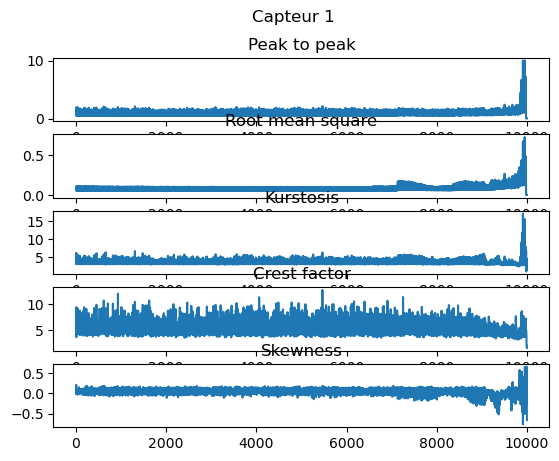

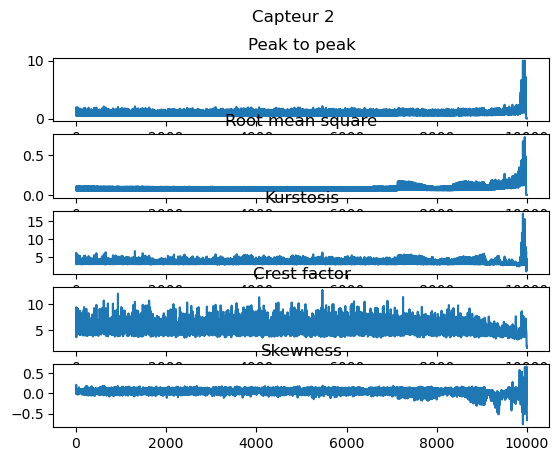

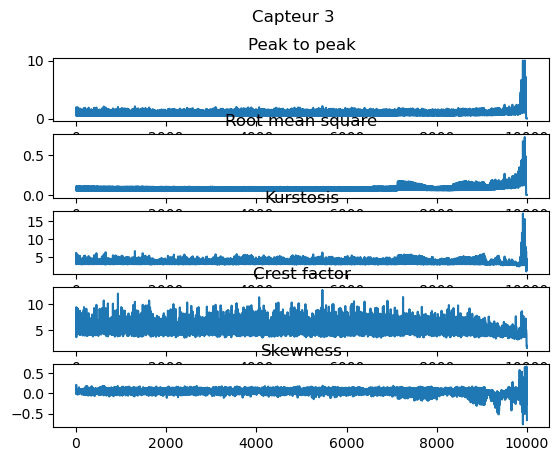

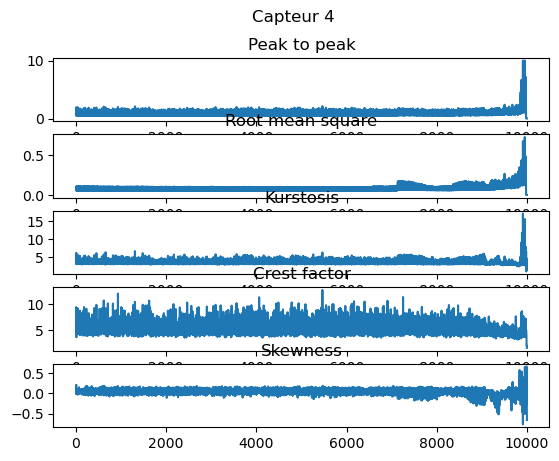

In [9]:
for i in range(4):
    fig, axs = plt.subplots(5)
    fig.suptitle(f'Capteur {i + 1}')
    axs[0].plot(np.linspace(0, 10000, len(peak_to_peak_stats[i])), peak_to_peak_stats[i])
    axs[0].set_title('Peak to peak')
    axs[1].plot(np.linspace(0, 10000, len(root_mean_square_stats[i])), root_mean_square_stats[i])
    axs[1].set_title('Root mean square')
    axs[2].plot(np.linspace(0, 10000, len(kurtosis_stats[i])), kurtosis_stats[i])
    axs[2].set_title('Kurstosis')
    axs[3].plot(np.linspace(0, 10000, len(crest_stats[i])), crest_stats[i])
    axs[3].set_title('Crest factor')
    axs[4].plot(np.linspace(0, 10000, len(skewnes_stats[i])), skewnes_stats[i])
    axs[4].set_title('Skewness')

### d) Sensibilité au défaut

Tous les indicateurs à l'exception du facteur de crête semblent sensibles au défaut. Le peak to peak augmente drastiquement, de même que la RMS et le kurtosis, là où c'est l'amplitude de l'asymmétrie qui augmente.

### e) Défaut

Le défaut, en se basant sur les données récoltées précédemment, semble apparaître plus avant, avec deux premières vibrations parasites qui ont pu endommager le composant, dont la défaillance s'est ensuite aggravée.

## Exercice 3

En se basant sur les résultats ci-dessus, on remarque une concordance avec la conclusion ci-dessus.